## Assignment 6
### Meenu Ravi
### May 12 2021


### Part 1 – 20 pts Exploratory Data Analysis



In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.forecasting.all import temporal_train_test_split
from statsmodels.tsa.stattools import kpss, adfuller
import warnings
import math
warnings.filterwarnings('ignore')

#### A. 10 pts Perform quantitative and qualitative EDA


In [86]:
data=pd.read_csv('hw6_data_var.csv')
data

,Unnamed: 0,PCE,AHE,PCEPI
0,3/1/2006,9122.1,20.04,88.473
1,4/1/2006,9174.8,20.17,88.850
2,5/1/2006,9215.1,20.13,89.070
3,6/1/2006,9240.8,20.22,89.285
4,7/1/2006,9322.6,20.30,89.601
...,...,...,...,...
161,8/1/2019,14650.9,28.16,110.115
162,9/1/2019,14673.2,28.15,110.167
163,10/1/2019,14728.5,28.24,110.377
164,11/1/2019,14752.8,28.33,110.461


In [87]:
data = data.rename(columns={'Unnamed: 0': 'ds'})
data

,ds,PCE,AHE,PCEPI
0,3/1/2006,9122.1,20.04,88.473
1,4/1/2006,9174.8,20.17,88.850
2,5/1/2006,9215.1,20.13,89.070
3,6/1/2006,9240.8,20.22,89.285
4,7/1/2006,9322.6,20.30,89.601
...,...,...,...,...
161,8/1/2019,14650.9,28.16,110.115
162,9/1/2019,14673.2,28.15,110.167
163,10/1/2019,14728.5,28.24,110.377
164,11/1/2019,14752.8,28.33,110.461


In [88]:
data.shape

(166, 4)

In [89]:
missing_values=data.isna().sum()
full=len(data)
percent=(missing_values/full)*100
percent

ds       0.0
PCE      0.0
AHE      0.0
PCEPI    0.0
dtype: float64

In [90]:
data.describe()

,PCE,AHE,PCEPI
count,166.000000,166.000000,166.000000
mean,11507.872289,23.938193,100.006169
std,1630.579647,2.235573,6.028324
min,9122.100000,20.040000,88.473000
25%,10009.000000,22.237500,95.145000
50%,11204.100000,23.765000,100.861000
75%,12789.900000,25.675000,104.186250
max,14796.300000,28.360000,110.750000


In [91]:
data.dtypes

ds        object
PCE      float64
AHE      float64
PCEPI    float64
dtype: object

In [92]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows: ", duplicate_rows.shape)

Duplicate rows:  (0, 4)


In [93]:
data.columns[0]

'ds'

(array([], dtype=int64),)


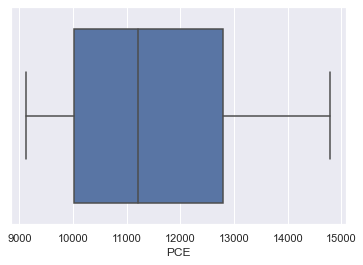

In [94]:
sns.boxplot(x=data['PCE'])
print(np.where(data['PCE']>data['PCE'].quantile(0.75) + (1.5 * (data['PCE'].quantile(0.75)-
                                                                  data['PCE'].quantile(0.25)))))



(array([], dtype=int64),)


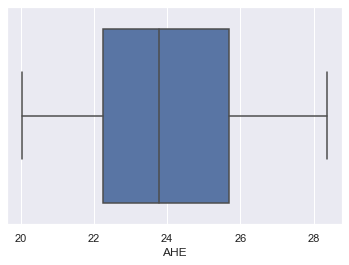

In [95]:
sns.boxplot(x=data['AHE'])
print(np.where(data['AHE']>data['AHE'].quantile(0.75) + (1.5 * (data['AHE'].quantile(0.75)-
                                                                  data['AHE'].quantile(0.25)))))



(array([], dtype=int64),)


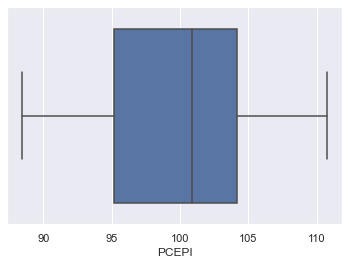

In [96]:
sns.boxplot(x=data['PCEPI'])
print(np.where(data['PCEPI']>data['PCEPI'].quantile(0.75) + (1.5 * (data['PCEPI'].quantile(0.75)-
                                                                  data['PCEPI'].quantile(0.25)))))

<AxesSubplot:>

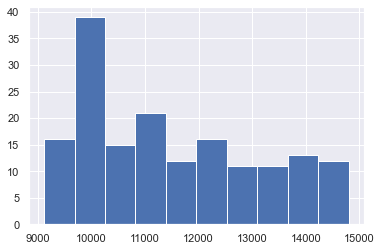

In [97]:
data['PCE'].hist()

<AxesSubplot:>

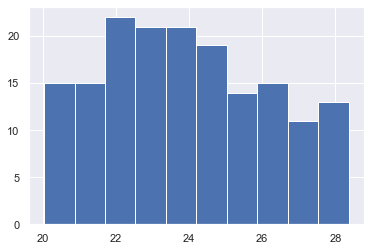

In [98]:
data['AHE'].hist()

<AxesSubplot:>

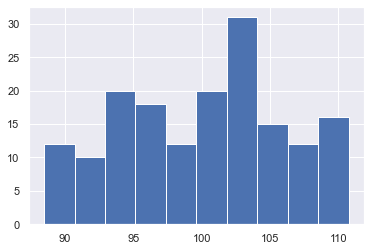

In [99]:
data['PCEPI'].hist()

<AxesSubplot:>

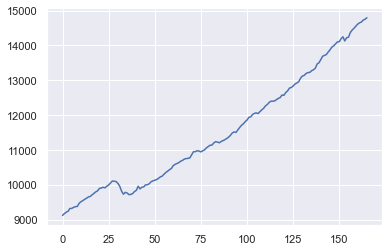

In [100]:
data['PCE'].plot()


<AxesSubplot:>

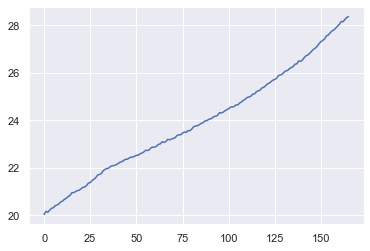

In [101]:
data['AHE'].plot()


<AxesSubplot:>

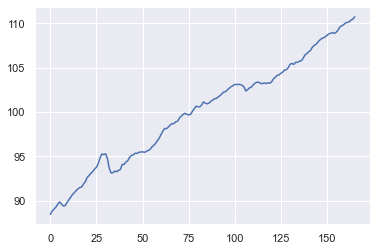

In [102]:
data['PCEPI'].plot()

<AxesSubplot:>

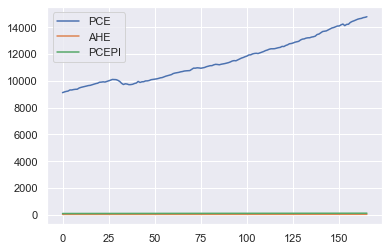

In [103]:
data['PCE'].plot(legend=True)
data['AHE'].plot(legend=True)
data['PCEPI'].plot(legend=True)

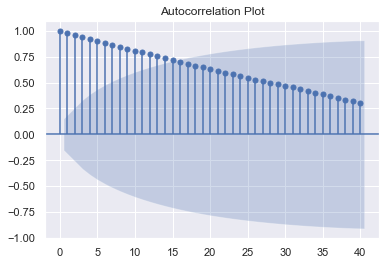

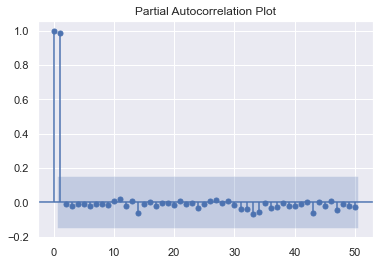

In [104]:
p=plot_acf(data['PCE'], lags=40,title='Autocorrelation Plot')
p = plot_pacf(data['PCE'],lags=50,  title='Partial Autocorrelation Plot')

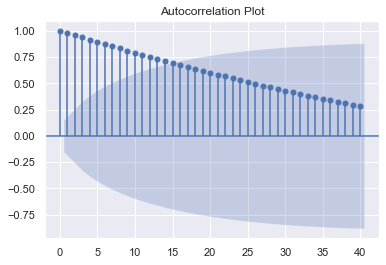

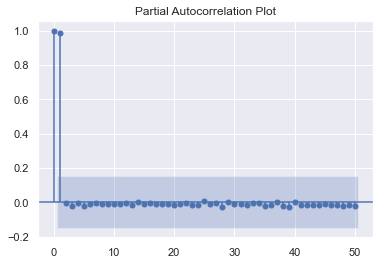

In [105]:
p=plot_acf(data['AHE'], lags=40,title='Autocorrelation Plot')
p = plot_pacf(data['AHE'],lags=50,  title='Partial Autocorrelation Plot')

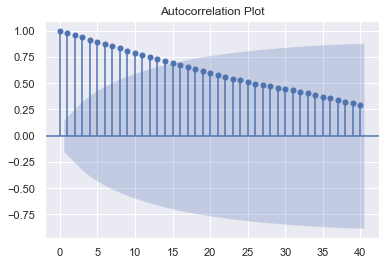

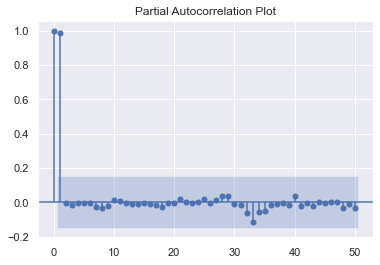

In [106]:
p=plot_acf(data['PCEPI'], lags=40,title='Autocorrelation Plot')
p = plot_pacf(data['PCEPI'],lags=50,  title='Partial Autocorrelation Plot')

In [107]:
def adf_kpss_test(timeseries,trend='c'):
    #Perform Dickey-Fuller test:
    df_results=[]
    kpss_results=[]
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("---------------")
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    for i in dfoutput:
        i=round(i,6)
        df_results.append(i)
    for i in kpss_output:
        i=round(i,6)
        kpss_results.append(i)
    return (df_results,kpss_results)

In [108]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['PCE'], trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                   2.189889
p-value                          0.998874
#Lags Used                       2.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            1.190019
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


In [109]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['AHE'], trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                   1.680032
p-value                          0.998079
#Lags Used                       9.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            1.207634
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


In [110]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['PCEPI'], trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                  -0.434152
p-value                          0.904239
#Lags Used                       1.000000
Number of Observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            1.206769
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


#### B. 10 pts Give a summary of your findings

In order to explore the data, I started by first reading in the data and looking at the first few and last few rows.I saw that there were 4 rows: the date, the PCE, AHE, and PCEPI. The date column went by months. I also renamed the date column to ds to easily be able to use it in any functions and analysis in the future.


By looking at the shape of the data set, I found that there are 166 rows in this dataset and 4 columns.. Next, I checked for any possible missing values in the dataset. I found that there were no missing values. I then checked the statistics for the dataset. I saw that the PCE clumn values ranged from 9122.8 to 14796.3, with the median being 11204.1. For the AHE column the values range from 20.04 to 28.36, with the median being 23.7. Lastly, the PCEPI column ranged from 88.47 to 110.75, with the median being 100.86. Next, I wanted to see what the data types were stored as so that if needed, I can do any conversion so that it is easier for future analysis. I found that since the datae column was stored as an object and the other three columns (PCE,AHE, and PCEPI) were stored as flot64 (integers), I did not need to do any type conversions for now. Next, I wanted to see if there were any duplicate rows. If there were, we would need to remove the duplicates. I found that there were no duplicate rows. Then, I proceeded to check for any outliers in the three data columns. I found that all three columns had no outliers. Then, I looked at the histograms for the three data columns so that I could easily visualize the spread of data. The PCE values were mostly concentrated around 10000 and the data looked pretty evenly spread. The AHE column also seemed somewhat evenly spread, but with the majority of values concentrated around 22-24. The PCEPI column has less of an even spread compared with the other two columns. Its values are concentrated around 103. Then, I plotted the three columns to better visualize them. I saw that the PCE column had a steady upward trend. There was a slight trench in the graph at 25 where there was a decrease. The AHE column had a steady upward trend too. The PCEPI column looks similar to the PCE column  where there a slight trench at 25. When I plotted them on the same graph, the AHE and PCEPI seemed to lay over each other. Next, I plotted the ACF and PACF plots. For PCE, The ACF is decays and in the PACF, the is just one large lag that is very significant (almost 1) at lag 1. For AHE, the ACF plot is decaying while the PACF plot again shows a large significance at lag 1. The PCEPI plot for ACF is decaying and the PACF plot shows a large spike at lag 1. Lastly, I could tell from the plots that there was no stationarity in the tree data columns since the mean was not stable and the variance was not stable.  I still checked the stationarity using ADF and KPSS test. They both confirmed my original hypothesis that there was an absence of stationarity in the data columns.

### Part 2 – 40 pts Granger Causality

#### A. 8 pts Consider PCE and AHE, give an intuitive description of the relationship between the two economic measures. This is your opinion, looking for logic and understanding not right or wrong

One gets income through working, which can be used to purchase goods and services. PCE is Personal consumptions expenditures. It is the primary measure of consumer spending on goods and services in the US economy. AHE is  Average hourly earnings in dollars per hours. If individuals earn more money ie. their salary or wage rate is higher, then then can use a specific amount of money for the necessities- food, clothing, utilities and still have a portions remaining for leisure spending. This leisure spending will increase if the ages goes up because people have a higher proportion of money to spend on activities, toys etc.

Consumers choose their current comsumption level based on their purchasing power. Therefore, I believe as AHE increases, PCE will increase. However, I think that both will increase at a similar rate because if more people start to purchase goods, then the price of these goods will increase and less people will consume goods. 

#### B. 8 pts Difference the two variables

In [111]:
data

,ds,PCE,AHE,PCEPI
0,3/1/2006,9122.1,20.04,88.473
1,4/1/2006,9174.8,20.17,88.850
2,5/1/2006,9215.1,20.13,89.070
3,6/1/2006,9240.8,20.22,89.285
4,7/1/2006,9322.6,20.30,89.601
...,...,...,...,...
161,8/1/2019,14650.9,28.16,110.115
162,9/1/2019,14673.2,28.15,110.167
163,10/1/2019,14728.5,28.24,110.377
164,11/1/2019,14752.8,28.33,110.461


In [112]:
data_series_AHE=data['AHE']
data_series_AHE.index=pd.core.indexes.period.PeriodIndex(data['ds'].tolist(),freq='m')
data_series_AHE

2006-03    20.04
2006-04    20.17
2006-05    20.13
2006-06    20.22
2006-07    20.30
           ...  
2019-08    28.16
2019-09    28.15
2019-10    28.24
2019-11    28.33
2019-12    28.36
Freq: M, Name: AHE, Length: 166, dtype: float64

In [113]:
data_series_PCE=data['PCE']
data_series_PCE.index=pd.core.indexes.period.PeriodIndex(data['ds'].tolist(),freq='m')
data_series_PCE

2006-03     9122.1
2006-04     9174.8
2006-05     9215.1
2006-06     9240.8
2006-07     9322.6
            ...   
2019-08    14650.9
2019-09    14673.2
2019-10    14728.5
2019-11    14752.8
2019-12    14796.3
Freq: M, Name: PCE, Length: 166, dtype: float64

Differencing AHE

<AxesSubplot:>

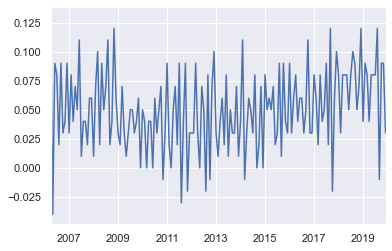

In [114]:
AHE_nonseas_diff = data_series_AHE.diff().dropna()
AHE_nonseas_diff.plot()

In [115]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(AHE_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                  -1.012276
p-value                          0.748761
#Lags Used                      14.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.456203
p-value                   0.052930
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: True


In [116]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(AHE_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                  -1.012276
p-value                          0.748761
#Lags Used                      14.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.456203
p-value                   0.052930
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: True


Differencing PCE

<AxesSubplot:>

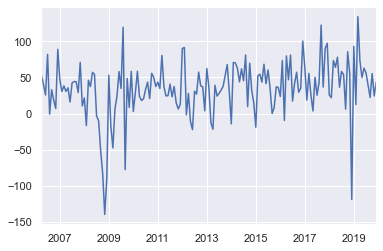

In [117]:
PCE_nonseas_diff = data_series_PCE.diff().dropna()
PCE_nonseas_diff.plot()

In [118]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(PCE_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -6.605709e+00
p-value                        6.564988e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.630000e+02
Critical Value (1%)           -3.471119e+00
Critical Value (5%)           -2.879441e+00
Critical Value (10%)          -2.576314e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.487339
p-value                   0.044518
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: False


In [119]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(PCE_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -6.605709e+00
p-value                        6.564988e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.630000e+02
Critical Value (1%)           -3.471119e+00
Critical Value (5%)           -2.879441e+00
Critical Value (10%)          -2.576314e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.487339
p-value                   0.044518
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: False


#### C. 8 pts Check Granger Causality for the direction you stated in 2A, return plot of results

In [120]:
from statsmodels.tsa.stattools import grangercausalitytests, q_stat

Does AHE Granger Cause PCE?

In [121]:
granger=pd.DataFrame()
granger['PCE']=PCE_nonseas_diff
granger['AHE']=AHE_nonseas_diff
granger.index=PCE_nonseas_diff.index
granger

,PCE,AHE
2006-04,52.7,0.13
2006-05,40.3,-0.04
2006-06,25.7,0.09
2006-07,81.8,0.08
2006-08,-0.8,0.02
...,...,...
2019-08,39.0,0.12
2019-09,22.3,-0.01
2019-10,55.3,0.09
2019-11,24.3,0.09


In [122]:
granger_results = grangercausalitytests(granger, maxlag=20, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0290  , p=0.8648  , df=1
likelihood ratio test: chi2=0.0290  , p=0.8648  , df=1
parameter F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=0.2531  , p=0.8811  , df=2
likelihood ratio test: chi2=0.2529  , p=0.8812  , df=2
parameter F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=0.5457  , p=0.9087  , df=3
likelihood ratio test: chi2=0.5448  , p=0.9089  , df=3
parameter F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5205  , p=0.7208  

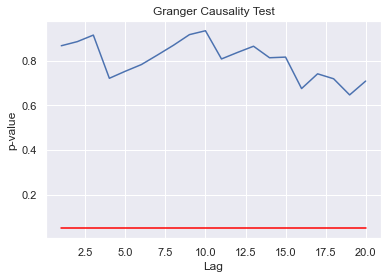

In [123]:
alpha=0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
# plt.legend()

plt.show()

AHE doesn't granger causes PCE

#### D. 8 pts Check Granger Causality for the opposite direction you stated in 2A, return plot of results

Does PCE granger cause AHE

In [124]:
granger2=pd.DataFrame()
granger2['AHE']=AHE_nonseas_diff
granger2['PCE']=PCE_nonseas_diff
granger2.index=PCE_nonseas_diff.index
granger2

,AHE,PCE
2006-04,0.13,52.7
2006-05,-0.04,40.3
2006-06,0.09,25.7
2006-07,0.08,81.8
2006-08,0.02,-0.8
...,...,...
2019-08,0.12,39.0
2019-09,-0.01,22.3
2019-10,0.09,55.3
2019-11,0.09,24.3


In [125]:
granger2_results = grangercausalitytests(granger2, maxlag=20, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0189  , p=0.8906  , df=1
likelihood ratio test: chi2=0.0189  , p=0.8906  , df=1
parameter F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=2.3466  , p=0.3094  , df=2
likelihood ratio test: chi2=2.3298  , p=0.3119  , df=2
parameter F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=5.4546  , p=0.1414  , df=3
likelihood ratio test: chi2=5.3648  , p=0.1470  , df=3
parameter F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7223  , p=0.1479  

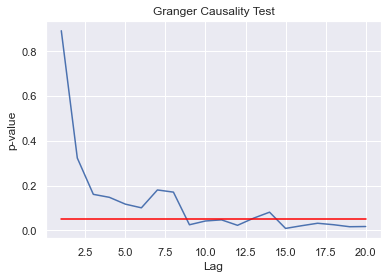

In [126]:
alpha=0.05
res_list = []
for lag, v in granger2_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
# plt.legend()

plt.show()

Evidence of PCE granger causing AHE

#### E. 8 pts Summarize your findings. You must understand the underlying null hypothesis of test.

I first started by checking if AHE granger causes PCE. The null hypothesis is that the (second column) AHE does not granger cause the (first columns) PCE. If the p value is less than 0.05, my alpha value, I can reject the null hypothesis and say that AHE does granger cause the AHE. However, since my p values for the first 20 lags show the p value is large and well above the 0.05 threshold, which I have marked in a red line, I can accept the null hypothesis and conclude that based on the granger causality test, AHE does not granger cause PCE. Therefore, the average hourly earnings does not cause consumption based on this data. if people earning more amount of money per hour, that does not necessarily mean that consumption will go up down. 
Next I checked the opposite direction. So, I checked if PCE granger causes AHE. I swapped the order of the columns so that the PCE was the second column and AHE was the first column. 

Next, I checked for granger causality. Lastly, I plotted the p values at each of the first 20 lags. I saw that from lag 1 to lag 8 and then after lag 13 and before lag 14,  PCE does not granger cause AHE. Then, I saw that after lag 8 and before lag 13 and then after lag 14, PCE granger causes AHE. At lag 8-13 and after lag 14, I can say that the PCE granger causes AHE because the p value at these lags is less that 0.05 and we can reject the null hypothesis. But, before lag 8 and at that 13-14, I need to accept that null hypothesis because the p values at these lags is more than 0.05. Because that certain lags, there is evidence of granger causality, that PCE granger causes AHE, it means that as the consumption increases and people are starting to buy more goods, the business may go up in profit and be able to pay their employees more money per hours and the employees may also be working longer hours to help produce goods or handle the increased consumption. We start to see this but it seems to be lagged, which is why we are seeing the causality after some time.

### Part 3 – 40 pts VARMA modeling



#### A. 8 pts Using differenced data, run a search to find the best fit order for AH, PCE, and PCEIP, return a plot


In [127]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import smape_loss, mase_loss

In [128]:
data_series_PCEPI=data['PCEPI']
data_series_PCEPI.index=pd.core.indexes.period.PeriodIndex(data['ds'].tolist(),freq='m')
data_series_PCEPI

2006-03     88.473
2006-04     88.850
2006-05     89.070
2006-06     89.285
2006-07     89.601
            ...   
2019-08    110.115
2019-09    110.167
2019-10    110.377
2019-11    110.461
2019-12    110.750
Freq: M, Name: PCEPI, Length: 166, dtype: float64

<AxesSubplot:>

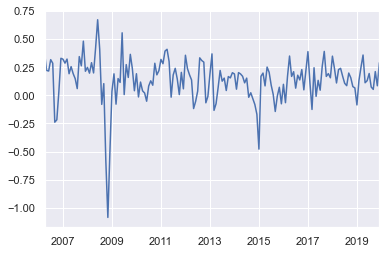

In [129]:
PCEPI_nonseas_diff = data_series_PCEPI.diff().dropna()
PCEPI_nonseas_diff.plot()

In [130]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(PCEPI_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -7.507425e+00
p-value                        4.099451e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)          -2.576255e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.094052
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: True


In [131]:
combined=pd.DataFrame()
combined['PCE']=PCE_nonseas_diff
combined['AHE']=AHE_nonseas_diff
combined['PCEPI']=PCEPI_nonseas_diff
combined.index=PCE_nonseas_diff.index
combined

,PCE,AHE,PCEPI
2006-04,52.7,0.13,0.377
2006-05,40.3,-0.04,0.220
2006-06,25.7,0.09,0.215
2006-07,81.8,0.08,0.316
2006-08,-0.8,0.02,0.284
...,...,...,...
2019-08,39.0,0.12,0.073
2019-09,22.3,-0.01,0.052
2019-10,55.3,0.09,0.210
2019-11,24.3,0.09,0.084


In [132]:
y_train = combined[:-12]
y_test = combined[-12:]

In [133]:
data.index=data.ds
data=data.drop(columns=['ds'])
data
# y_train

,PCE,AHE,PCEPI
ds,,,
3/1/2006,9122.1,20.04,88.473
4/1/2006,9174.8,20.17,88.850
5/1/2006,9215.1,20.13,89.070
6/1/2006,9240.8,20.22,89.285
7/1/2006,9322.6,20.30,89.601
...,...,...,...
8/1/2019,14650.9,28.16,110.115
9/1/2019,14673.2,28.15,110.167
10/1/2019,14728.5,28.24,110.377


In [134]:
var_model = VAR(data).fit()
yhat = var_model.forecast(var_model.endog, steps=1)
print(yhat)

[[14853.74403153    28.4270683    110.91210659]]


In [135]:
var_model=VAR(y_train)

results_aic =[]
for p in range(1,10):
    results = var_model.fit(p)
    results_aic.append(results.aic)

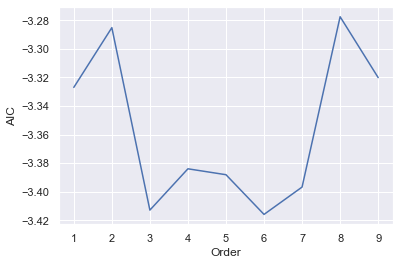

[-3.3269890131054987, -3.2851892504352143, -3.4128603334589407, -3.383957548148084, -3.3880953966599336, -3.4158792526130353, -3.3967423931077416, -3.2775556620662947, -3.3201216146793873]


In [136]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()
print(results_aic)

Here we can see that the lowest AIC score is achieved at order of 6. Then AIC increases afterwards. We should fit a VAR(6)model. 

The textbook recommends that we use BIC to find the VAR order. Let's try that to see if there is a difference

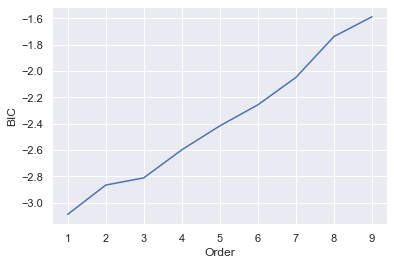

[-3.0882616035650035, -2.865567551275523, -2.8107332746396896, -2.597689723101957, -2.4160265511148156, -2.2563237597804644, -2.0479887148012335, -1.737865795297032, -1.5877305232600536]


In [137]:
results_bic =[]
for p in range(1,10):
    results = var_model.fit(p)
    results_bic.append(results.bic)
    

plt.plot(list(np.arange(1,10,1)), results_bic)
plt.xlabel("Order")
plt.ylabel("BIC")
plt.show()
print(results_bic)

Since in this plot we see that order 1 has the lowest BIC score, we will fit a VAR(1) model since there are less parameters to estimate than by using AIC

#### B. 8 pts Fit the VAR model with chosen order, return the model summary.


In [138]:
results = var_model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, May, 2021
Time:                     08:20:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.08826
Nobs:                     152.000    HQIC:                  -3.23001
Log likelihood:          -382.185    FPE:                  0.0359023
AIC:                     -3.32699    Det(Omega_mle):       0.0332108
--------------------------------------------------------------------
Results for equation PCE
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           24.304900         6.082722            3.996           0.000
L1.PCE           0.129418         0.100980            1.282           0.200
L1.AHE         -29.771851        91.046781           -0.327           0.744
L1.PCE

#### C. 8 pts Explain the values in the correlation matrix of residuals. What are the implications for the model fit?


In the correlation matrix of the VAR model, the the diagonals are all 1. This means that the residuals of the variables PCE, AHE, and PCEPI are the perfectly correlated with themselves: PCE residuals is perfectly correlated with PCE, AHE residuals  is perfectly correlated with AHE and PCEPI residuals  is perfectly correlated with PCEPI. 

If we look the the correlation of AHE and PCE residuals, it is the same as the correlation of PCE and AHE residuals , which is -0.05. They are negatively correlated. The residual correlation matrix is the difference between the actual correlations and the modeled or fitted correlation. So for AHE and PCE, the the difference between actual and fitted is negative. The fitted value correlation between AHE and PCE is slightly larger than the actual correlation.

When we look at the PCEPI and PCE, the correlation is 0.48. This is somewhat significant but still less that 50%. The correlation of the residuals of the PCE and PCEPI is positive. So, this means the difference between the actual correlation and fitted correlation is positive. Therefore, the fitted correlation is slightly less than the actual correlation. 

Lastly, when we look at the AHE and PCEPI relationship, we see that there is a negative relationship between the residuals. So, the actual correlation and the fitted correlations between AHE and PCEPI is slightly negative: -0.049. Therefore, the fitted correlation is slightly grater than the actual correlation of AHE and PCEPI. 

The three values we just saw are not very significantly. That are pretty close to 0. The implications of the model fit are that the model is pretty good. The correlation matrix implies that the model fit is pretty good because the values are pretty close to 0. This shows that the relationships between the variables are being maintained pretty well. One way to improve it would be to fit a model when the residual correlation between PCE and PCEPI is slightly smaller.

#### D. 8 pts Create 12 periods of forecast for all three variables, return plots of predicted values against actual values, Return variable level RMSE (3 total)

In [139]:
yhat = results.forecast(var_model.endog, steps=12)
yhat

array([[ 7.94844226e+00,  2.87695343e-02, -5.00650232e-02],
       [ 2.24713557e+01,  5.63321144e-02,  2.73112203e-02],
       [ 2.66301354e+01,  4.73923092e-02,  8.11977128e-02],
       [ 2.95933055e+01,  4.94703725e-02,  1.03710915e-01],
       [ 3.08168472e+01,  4.86228908e-02,  1.16213355e-01],
       [ 3.15012981e+01,  4.87429843e-02,  1.22090208e-01],
       [ 3.18217409e+01,  4.86464156e-02,  1.25128850e-01],
       [ 3.19878208e+01,  4.86433130e-02,  1.26615466e-01],
       [ 3.20689635e+01,  4.86287668e-02,  1.27366288e-01],
       [ 3.21099773e+01,  4.86252509e-02,  1.27738580e-01],
       [ 3.21303046e+01,  4.86224164e-02,  1.27925149e-01],
       [ 3.21404940e+01,  4.86213125e-02,  1.28018074e-01]])

In [140]:
# clean up yhat
idx=y_test.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds.columns =[[ 'pce_forecast','ahe_forecast','pcepi_forecast']]
df_preds

,pce_forecast,ahe_forecast,pcepi_forecast
2019-01,7.948442,0.028770,-0.050065
2019-02,22.471356,0.056332,0.027311
2019-03,26.630135,0.047392,0.081198
2019-04,29.593306,0.049470,0.103711
2019-05,30.816847,0.048623,0.116213
2019-06,31.501298,0.048743,0.122090
2019-07,31.821741,0.048646,0.125129
2019-08,31.987821,0.048643,0.126615
2019-09,32.068963,0.048629,0.127366
2019-10,32.109977,0.048625,0.127739


In [141]:
data.index=pd.core.indexes.period.PeriodIndex(data.index.tolist(),freq='m')

In [142]:
df_preds.columns = data.columns
forecast_results = pd.concat([data[-13:-12],df_preds], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)
forecast_results.columns=['pce_forecast','ahe_forecast','pcepi_forecast']

In [143]:
forecast_results

,pce_forecast,ahe_forecast,pcepi_forecast
2019-01,14138.748442,27.578770,108.907935
2019-02,14161.219798,27.635102,108.935246
2019-03,14187.849933,27.682494,109.016444
2019-04,14217.443239,27.731964,109.120155
2019-05,14248.260086,27.780587,109.236368
2019-06,14279.761384,27.829330,109.358458
2019-07,14311.583125,27.877977,109.483587
2019-08,14343.570946,27.926620,109.610203
2019-09,14375.639909,27.975249,109.737569
2019-10,14407.749887,28.023874,109.865308


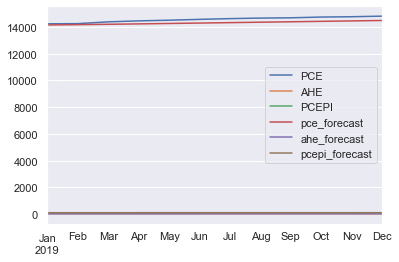

In [144]:
final_results = pd.concat([data[-12:],forecast_results], axis=1)
final_results.plot()
plt.show()

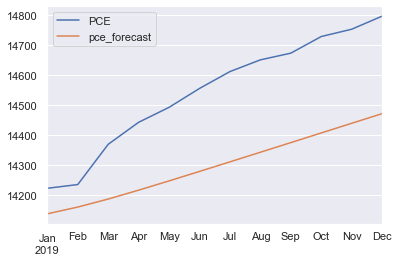

In [145]:
final_results1 = pd.concat([data['PCE'][-12:],forecast_results['pce_forecast']], axis=1)
final_results1.plot()
plt.show()

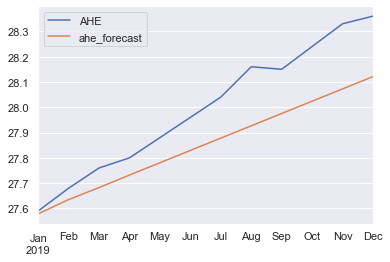

In [146]:
final_results2 = pd.concat([data['AHE'][-12:],forecast_results['ahe_forecast']], axis=1)
final_results2.plot()
plt.show()

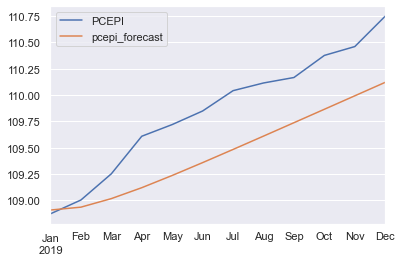

In [147]:
final_results3 = pd.concat([data['PCEPI'][-12:],forecast_results['pcepi_forecast']], axis=1)
final_results3.plot()
plt.show()

In [148]:
final_results

,PCE,AHE,PCEPI,pce_forecast,ahe_forecast,pcepi_forecast
2019-01,14223.7,27.59,108.872,14138.748442,27.578770,108.907935
2019-02,14236.1,27.68,109.003,14161.219798,27.635102,108.935246
2019-03,14370.0,27.76,109.252,14187.849933,27.682494,109.016444
2019-04,14443.2,27.80,109.609,14217.443239,27.731964,109.120155
2019-05,14493.0,27.88,109.720,14248.260086,27.780587,109.236368
2019-06,14555.8,27.96,109.849,14279.761384,27.829330,109.358458
2019-07,14611.9,28.04,110.042,14311.583125,27.877977,109.483587
2019-08,14650.9,28.16,110.115,14343.570946,27.926620,109.610203
2019-09,14673.2,28.15,110.167,14375.639909,27.975249,109.737569
2019-10,14728.5,28.24,110.377,14407.749887,28.023874,109.865308


In [149]:
print('VAR PCE RMSE: ' + str(sqrt(mean_squared_error(final_results['PCE'],final_results['pce_forecast']))))
print('VAR AHE RMSE: ' + str(sqrt(mean_squared_error(final_results['AHE'],final_results['ahe_forecast']))))
print('VAR PCEPI RMSE: ' + str(sqrt(mean_squared_error(final_results['PCEPI'],final_results['pcepi_forecast']))))

VAR PCE RMSE: 260.1607535784575
VAR AHE RMSE: 0.1635733061737487
VAR PCEPI RMSE: 0.4473892816079645


#### E. 8 pts What is the advantage of this VAR model? What would ARIMA or prophet models on this dataset look like, if we were asked to forecast AHE?

One limitation of the models we have used before like the ARIMA models for example is that they show a more unidirectional relationship where the forecast variable is influenced by the predictor variables, but we don't see the opposite relationship where the predictor variables is influenced by the forecast variable. When looking at data where we are not really sure of what the predictor and forecast variables are or should be, I think it is a good idea to see how all the variables affect each other. In this particular example where we look at price of goods, consumption and hourly wages, it is very important to see how the variables affect each other becuase they are all so interrelated. Seeing such feedback relationships, where one variable and affect another and vice versa, is a advantage of the vector autoregressive (VAR) model. In this model, all variables are treated symmetrically. They are all modelled as if they all influence each other equally. All variables are now treated as endogenous.Another advantage is that forecasts of the VAR model are generated in a recursive manner. The VAR generates forecasts for each variable included in the system. So, even with a large data, it require less manual steps or coding because the fit function can handle multiple variables.

An ARIMA or prophet model of this dataset if we were asked to forecast AHE would include first handle the differencing making sure there is stationairty similar to what we hae done here. A difference is that AHE would be the forecast variable or the endogenous variable and the PCE and PCEPi would be external regressors- exogeneous variables. When we predict, we only predict AHE values. We would only see the forecasted values for AHE and not for PCE or PCEPI. Also, we would not be able to analyze the correlation or how one variable impacts another. It would be more unidirectional.